Mining Social and Geographic Datasets
-----------------------------------

Lab Class 7: Classification and Regression (Scikit-learn)
-------------------------------

https://scikit-learn.org/

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### loading dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### splits the dataset

In [4]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)


### decision tree classifier

In [5]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.6

### plot decision tree

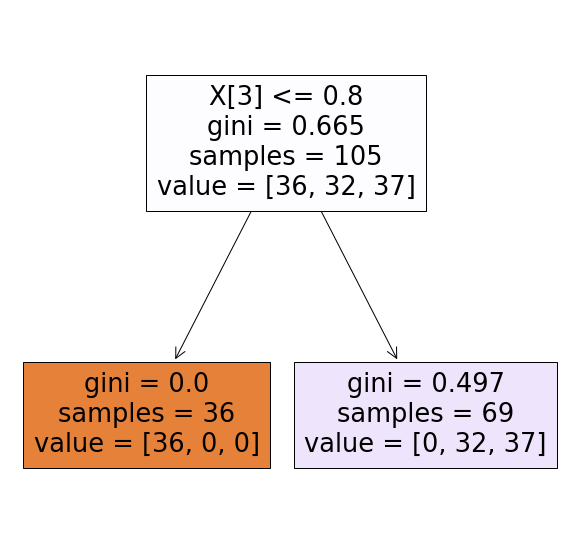

In [6]:
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True)
plt.show()

### extra: change max_depth>1 does the result change?

0.9555555555555556


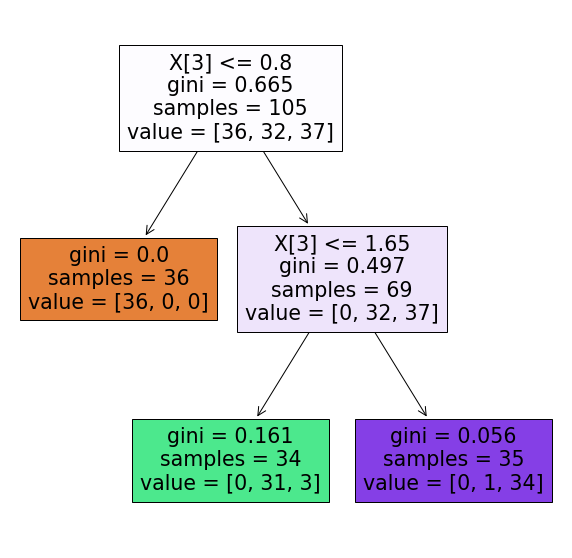

In [7]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
print (tree.score(X_test, y_test))
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True)
plt.show()

Lab Exercise 7: Regression on Airbnb dataset
-------------------------------
This dataset describes AirBNB listing activity and metrics in NYC, NY for 2019 which can be downloaded in the popular datascience website called Kaggle. For this particular exercise we will focus on predicting the price of an airbnb apartment.

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Inspiration

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [10]:
# this loads the dataset
df=pd.read_csv('AB_NYC_2019.csv')


In [11]:
# this drops dataset with missing data
df=df.dropna()

7a) Create one hot encoding for categorical variable (ie. neighbourhood_group, room_type) <br />
----------------------------------------------------------
hint: pd.get_dummies

In [12]:
dummies = pd.get_dummies(df.neighbourhood_group)
df=pd.concat([df, dummies], axis=1)

room_dummies = pd.get_dummies(df.room_type)
df=pd.concat([df, room_dummies], axis=1)

7b) Set your X(inputs) and y(outputs) <br />
----------------------------------------------------------
price must be logged : y=np.log(df.price+2)

explore these input variables: ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'neighbourhood_group', 'room_type']

In [53]:
X=df[['minimum_nights', 'number_of_reviews', 
       'reviews_per_month','Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room']]
y=np.log(df.price+2)

7c) standardise your input variables  <br />
----------------------------------------------------------
hint: sklearn.preprocessing

In [54]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)

7e) split dataset into a training set and a testing set <br />
----------------------------------------------------------
hint: set random_state as an integer to ensure we keep the same split for future models

In [55]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.4,shuffle=True, random_state=20)

7f) Run linear regression on training dataset <br />
----------------------------------------------------------
hint: from sklearn.linear_model import LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [57]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

7g) Report r2 and mse on testset <br />
----------------------------------------------------------

hint: from sklearn.metrics import r2_score,mean_squared_error

In [58]:
y_pred=model.predict(X_test)

In [59]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.4717774506351191

In [60]:
mean_squared_error(y_test,y_pred)

0.23048204829728441

7h) Extra: Add an extra geographical variable, does it make any difference?<br />
----------------------------------------------------------
for example try haversine distance from time square

In [71]:
finance=[40.708, -74.011]
finLat=finance[0]
finLon=finance[1]
timesquare=[40.757, -73.986]
TSLat=timesquare[0]
TSLon=timesquare[1]

In [72]:
# haversine distance function
# https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points#4913653

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [73]:
df['distCBD']=np.NaN
df['distTS']=np.NaN
for i in df.iterrows():
    curLat=i[1]['latitude']
    curLon=i[1]['longitude']
    dist_CBD=haversine(curLon,curLat,finLon,finLat)
    dist_TS=haversine(curLon,curLat,TSLon,TSLat)
    df.loc[i[0],'distCBD']=dist_CBD
    df.loc[i[0],'distTS']=dist_TS

In [74]:
X=df[['minimum_nights', 'number_of_reviews', 
       'reviews_per_month','Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room','distCBD','distTS']]
y=np.log(df.price+2)

In [75]:
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.4,shuffle=True, random_state=20)

In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [78]:
r2_score(y_test,y_pred)

0.5083891758225387

In [79]:
mean_squared_error(y_test,y_pred)

0.21450706687507937